<a href="https://colab.research.google.com/github/ebaurzhanoff/EnglishApp/blob/master/Paizkhan_Yernur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment - 1**

**1) Write a function called entropy which computes the entropy of a discrete random variable given its probability mass function [p1 p2 pN]**

In [3]:
import math

def entropy(pmf):
    """
    Calculate the entropy of a discrete random variable.

    Parameters:
    - pmf: Probability mass function as a list [p1, p2, ..., pN]

    Returns:
    - Entropy (float)
    """
    entropy_value = 0.0

    for probability in pmf:
        if probability > 0:
            entropy_value -= probability * math.log2(probability)

    return entropy_value

pmf_mass_function = [0.2, 0.3, 0.5]
result_entropy = entropy(pmf_mass_function)
print(f"Entropy: {result_entropy}")


Entropy: 1.4854752972273344


1) Import the math module to use the log2 function for calculating logarithms with base 2.

2) Define a function named entropy that takes a list of probabilities as its argument.

3) For a discrete random variable with probability mass function (PMF) [p1, p2, ..., pN], the entropy can be computed using the formula:

H(X)=−∑i=1Npi⋅log2(pi​)

In conslusion, Binary Random Variable: A binary random variable has only two possible outcomes, typically denoted as 0 and 1.

Entropy Calculation: The script calculates entropy for different values of p0
and plots the entropy function as a function of p0 the function first checks if the input probabilities form a valid probability mass function, then calculates the entropy using the specified formula, and finally returns the result.

**2) Write a script called test entropy2 which computes the entropy for a generic binary random variable as a function of p0 and plots the entropy function.**

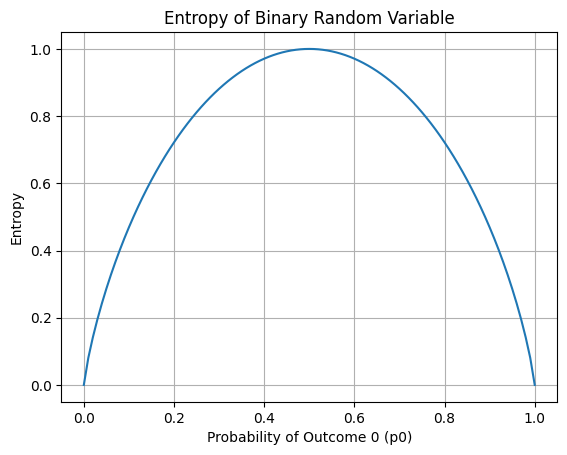

In [4]:
import math
import matplotlib.pyplot as plt

def entropy_binary(p0):
    """
    Compute the entropy of a binary random variable.

    Parameters:
    - p0 (float): Probability of the outcome 0.

    Returns:
    - float: Entropy of the binary random variable.
    """
    p1 = 1 - p0  # Probability of the outcome 1
    probabilities = [p0, p1]

    entropy_val = entropy(probabilities)
    return entropy_val

def entropy(probabilities):
    """
    Compute the entropy of a discrete random variable.

    Parameters:
    - probabilities (list): List of probabilities [p1, p2] for each possible outcome.

    Returns:
    - float: Entropy of the random variable.
    """
    # Ensure that probabilities sum up to 1
    if not math.isclose(sum(probabilities), 1.0):
        raise ValueError("Probabilities must sum to 1.")

    # Calculate entropy
    entropy_val = -sum(p * math.log2(p) if p > 0 else 0 for p in probabilities)

    return entropy_val

def plot_entropy_function():
    """
    Plot the entropy function for a binary random variable as a function of p0.
    """
    # Generate a range of p0 values
    p0_values = [i / 100 for i in range(101)]

    # Calculate entropy for each p0 value
    entropy_values = [entropy_binary(p0) for p0 in p0_values]

    # Plot the entropy function
    plt.plot(p0_values, entropy_values)
    plt.title('Entropy of Binary Random Variable')
    plt.xlabel('Probability of Outcome 0 (p0)')
    plt.ylabel('Entropy')
    plt.grid(True)
    plt.show()

# Execute the script
plot_entropy_function()

This script uses the matplotlib library for plotting and the scipy.stats.entropy function to calculate entropy. It generates a range of values for p0, calculates the corresponding entropy values, and then plots the entr0py function against p0.

In summary, joint entropy is a crucial concept in information theory and probability theory, providing a measure of uncertainty in the joint distribution of multiple random variables.


**3) Write a function called joint entropy which computes the joint entropy of two generic discrete random variables given their joint p.m.f.**

In [11]:
import math

def joint_entropy(joint_pmf):
    """
    Compute the joint entropy of two discrete random variables.

    Parameters:
    - joint_pmf (list of lists): Joint probability mass function P(X=x_i, Y=y_j).

    Returns:
    - float: Joint entropy of the two random variables.
    """
    # Check if the input is a valid joint probability mass function
    rows = len(joint_pmf)
    if rows == 0:
        raise ValueError("Joint probability mass function is empty.")

    cols = len(joint_pmf[0])
    if any(len(row) != cols for row in joint_pmf):
        raise ValueError("Rows in joint probability mass function must have the same length.")

    # Calculate joint entropy
    joint_entropy_val = -sum(p * math.log2(p) if p > 0 else 0
                             for row in joint_pmf
                             for p in row)

    return joint_entropy_val


# Example joint entropy
joint_pmf_example = [
    [0.1, 0.2, 0.1],
    [0.3, 0.1, 0.2]
]

result_joint_entropy = joint_entropy(joint_pmf_example)
print(f"Joint Entropy: {result_joint_entropy}")



Joint Entropy: 2.446439344671016


Joint entropy is a measure of uncertainty or information content associated with a pair of random variables considered together. It quantifies the amount of disorder or unpredictability in the joint distribution of two variables. The joint entropy of two discrete random variables, X and Y, with a joint probability mass function (PMF) P(X=x, Y=y), is defined by the formula:

1. **Joint Probability Distribution \( P(x,y) \)**: This represents the probability of the simultaneous occurrence of values \( x \) and \( y \) for random variables \( X \) and \( Y \). It's often represented in a table where each cell contains the probability of the corresponding pair of values.

2. **Conditional Probability Distribution \( P(x|y) \)**: This represents the probability of the occurrence of value \( x \) given that value \( y \) has already occurred. It's calculated by dividing the joint probability \( P(x,y) \) by the marginal probability \( P(y) \).

3. **Conditional Entropy \( H(X|Y) \)**: This is calculated using the formula:

\[ H(X|Y) = - \sum_{y} \sum_{x} P(x,y) \log P(x|y) \]

so here:
   - \( P(x,y) \) is the joint probability distribution.
   - \( P(x|y) \) is the conditional probability distribution.

You iterate over all possible values of \( x \) and \( y \) and sum up the products of \( P(x,y) \) and \( \log P(x|y) \).

These values and formulas allow you to quantify the uncertainty of random variable \( X \) given the value of random variable \( Y \).

**4) Write a function called conditional entropy which computes the conditional entropy of two generic discrete random variables given their joint and marginal p.m.f.**

In [20]:
import math

def conditional_entropy(joint_pmf, marginal_pmf_x, marginal_pmf_y):
    """
    Calculate the conditional entropy of two discrete random variables.

    Parameters:
    - joint_pmf: Joint probability mass function as a 2D list [[p11, p12, ..., p1N], [p21, p22, ..., p2N], ..., [pM1, pM2, ..., pMN]]
    - marginal_pmf_x: Marginal probability mass function for variable X as a list [p1, p2, ..., pN]
    - marginal_pmf_y: Marginal probability mass function for variable Y as a list [p1, p2, ..., pM]

    Returns:
    - Conditional entropy (float)
    """
    conditional_entropy_value = 0.0

    for i in range(len(joint_pmf)):
        for j in range(len(joint_pmf[0])):
            if joint_pmf[i][j] > 0 and marginal_pmf_y[j] > 0:
                conditional_entropy_value -= joint_pmf[i][j] * math.log2(joint_pmf[i][j] / marginal_pmf_y[j])

    return conditional_entropy_value

# Example usage:
joint_pmf_example = [
    [0.1, 0.2, 0.1],
    [0.3, 0.1, 0.0],
    [0.0, 0.4, 0.1]
]
marginal_pmf_x_example = [0.4, 0.3, 0.3]
marginal_pmf_y_example = [0.4, 0.5, 0.1]

result_conditional_entropy = conditional_entropy(joint_pmf_example, marginal_pmf_x_example, marginal_pmf_y_example)
print(f"Conditional Entropy: {result_conditional_entropy}")

Conditional Entropy: 0.9498609162048068


Conditional entropy is a measure of the average uncertainty or information content of a random variable X given the value of another random variable Y. It quantifies the remaining uncertainty about X after the value of Y is known. In other words, conditional entropy represents the amount of entropy (or disorder) in X that is not explained by the knowledge of Y.

The function conditional_entropy takes the joint probability mass function and the marginal probability mass functions as input and returns the calculated conditional entropy. It iterates through each element of the joint PMF and accumulates the conditional entropy values.

**5) Write a function called mutual information which computes the mutual information of two generic discrete random variables given their joint and marginal p.m.f.**

In [24]:
import math

def mutual_information(joint_pmf, marginal_pmf_x, marginal_pmf_y):
    """
    Calculate the mutual information between two discrete random variables.

    Parameters:
    - joint_pmf: Joint probability mass function as a 2D list [[p11, p12, ..., p1N], [p21, p22, ..., p2N], ..., [pM1, pM2, ..., pMN]]
    - marginal_pmf_x: Marginal probability mass function for variable X as a list [p1, p2, ..., pN]
    - marginal_pmf_y: Marginal probability mass function for variable Y as a list [p1, p2, ..., pM]

    Returns:
    - Mutual information (float)
    """
    mutual_information_value = 0.0

    for i, row in enumerate(joint_pmf):
        for j, value in enumerate(row):
            if value > 0 and marginal_pmf_x[i] > 0 and marginal_pmf_y[j] > 0:
                mutual_information_value += value * math.log2(value / (marginal_pmf_x[i] * marginal_pmf_y[j]))

    return mutual_information_value

# Example usage:
joint_pmf_example = [
    [0.2, 0.2, 0.1],
    [0.3, 0.1, 0.0],
    [0.0, 0.4, 0.3]
]
marginal_pmf_x_example = [0.4, 0.3, 0.3]
marginal_pmf_y_example = [0.4, 0.5, 0.1]

result_mutual_information = mutual_information(joint_pmf_example, marginal_pmf_x_example, marginal_pmf_y_example)
print(f"Mutual Information: {result_mutual_information}")

Mutual Information: 2.097254035038048


The mutual information between two discrete random variables X and Y given the joint probability mass function p(X,Y) and marginal probability mass functions p(X) and p(Y) can be computed using the following formula:

I(X;Y)=∑i​∑j​pij​⋅log2(​pij/​pj​​pi)

Mutual information is a measure of the amount of information that knowing the value of one random variable provides about another random variable. It quantifies the reduction in uncertainty about one variable when the value of the other variable is known. For two discrete random variables, X and Y, the mutual information I(X;Y) is calculated using their joint probability mass function (joint_pmf) and marginal probability mass functions

**6) Compute the probability mass function of the features of the Iris dataset after having discretized the samples as integers and plot the p.m.f. of each feature.**

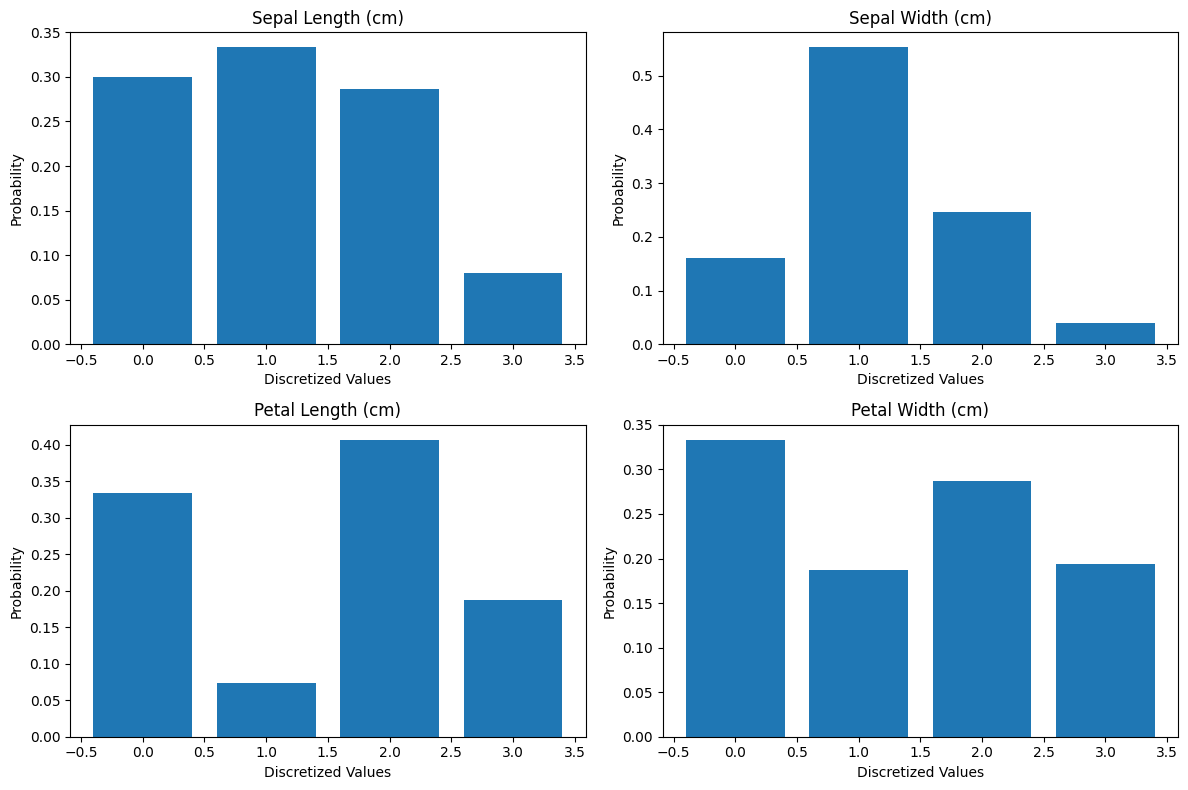

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Discretize the features into integers
data['sepal length (cm)'] = pd.cut(data['sepal length (cm)'], bins=4, labels=False)
data['sepal width (cm)'] = pd.cut(data['sepal width (cm)'], bins=4, labels=False)
data['petal length (cm)'] = pd.cut(data['petal length (cm)'], bins=4, labels=False)
data['petal width (cm)'] = pd.cut(data['petal width (cm)'], bins=4, labels=False)

# Compute the p.m.f. for each feature
pmf_sepal_length = data['sepal length (cm)'].value_counts(normalize=True).sort_index()
pmf_sepal_width = data['sepal width (cm)'].value_counts(normalize=True).sort_index()
pmf_petal_length = data['petal length (cm)'].value_counts(normalize=True).sort_index()
pmf_petal_width = data['petal width (cm)'].value_counts(normalize=True).sort_index()

# Plot the p.m.f. for each feature
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(pmf_sepal_length.index, pmf_sepal_length.values)
plt.title('Sepal Length (cm)')
plt.xlabel('Discretized Values')
plt.ylabel('Probability')

plt.subplot(2, 2, 2)
plt.bar(pmf_sepal_width.index, pmf_sepal_width.values)
plt.title('Sepal Width (cm)')
plt.xlabel('Discretized Values')
plt.ylabel('Probability')

plt.subplot(2, 2, 3)
plt.bar(pmf_petal_length.index, pmf_petal_length.values)
plt.title('Petal Length (cm)')
plt.xlabel('Discretized Values')
plt.ylabel('Probability')

plt.subplot(2, 2, 4)
plt.bar(pmf_petal_width.index, pmf_petal_width.values)
plt.title('Petal Width (cm)')
plt.xlabel('Discretized Values')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()



A probability mass function (PMF) is a mathematical function that provides the probability distribution of a discrete random variable. It assigns probabilities to each possible outcome or value that the random variable can take. In other words, the PMF specifies the likelihood of observing each specific value, and the sum of all probabilities in the PMF equals 1. The probability mass function is a fundamental concept in probability theory and statistical modeling, essential for characterizing the behavior of discrete random variables in various fields, including mathematics, statistics, and machine learning.

**7) Compute the entropy of the features of the Iris dataset (discrete entropy) and return the results.**

In [33]:
entropy_sepal_length = entropy(pmf_sepal_length)
entropy_sepal_width = entropy(pmf_sepal_width)
entropy_petal_length = entropy(pmf_petal_length)
entropy_petal_width = entropy(pmf_petal_width)

print("Entropy of Sepal Length:", entropy_sepal_length)
print("Entropy of Sepal Width:", entropy_sepal_width)
print("Entropy of Petal Length:", entropy_petal_length)
print("Entropy of Petal Width:", entropy_petal_width)

Entropy of Sepal Length: 1.2876256468739167
Entropy of Sepal Width: 1.0946914143717694
Entropy of Petal Length: 1.237015092285142
Entropy of Petal Width: 1.355394890091296


**8) Compute the mutual information between any pair of features of the Iris dataset (discrete mutual information) and return the pair of features having the largest mutual information.**

In [34]:
from scipy.stats import entropy

def compute_mutual_information(feature1, feature2):

    # Create a joint probability mass function (PMF)
    joint_pmf, _, _ = np.histogram2d(feature1, feature2, bins=(len(np.unique(feature1)), len(np.unique(feature2))))
    joint_pmf /= np.sum(joint_pmf)

    # Calculate marginal PMFs
    marginal_pmf_x = np.sum(joint_pmf, axis=1)
    marginal_pmf_y = np.sum(joint_pmf, axis=0)

    # Compute mutual information using joint and marginal PMFs
    mutual_info = 0
    for i in range(len(marginal_pmf_x)):
        for j in range(len(marginal_pmf_y)):
            if joint_pmf[i, j] != 0 and marginal_pmf_x[i] != 0 and marginal_pmf_y[j] != 0:
                mutual_info += joint_pmf[i, j] * np.log2(joint_pmf[i, j] / (marginal_pmf_x[i] * marginal_pmf_y[j]))

    return mutual_info

def find_max_mutual_information(features):
    max_mutual_info = 0
    max_pair = None
    n_features = features.shape[1]
    for i in range(n_features):
        for j in range(i + 1, n_features):
            mutual_info = compute_mutual_information(features[:, i], features[:, j])
            if mutual_info > max_mutual_info:
                max_mutual_info = mutual_info
                max_pair = (i, j)
    return max_pair

# Load the Iris dataset
iris = load_iris()
features = iris.data

# Find the pair of features with the largest mutual information
max_pair = find_max_mutual_information(features)
print("Pair of features with the largest mutual information:", max_pair)

Pair of features with the largest mutual information: (0, 2)


**Assignment - 2**



In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, names=names)
# Preprocess the dataset if needed (e.g., encoding class labels)

def multivariate_bayes_classifier(train_data, train_labels, test_data):
    model = MultinomialNB()
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    return predictions

def naive_bayes_classifier(train_data, train_labels, test_data):
    model = BernoulliNB()
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    return predictions

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
train_data, test_data, train_labels, test_labels = train_test_split(iris_data[features], iris_data['class'], test_size=0.5, stratify=iris_data['class'])

# For multivariate Bayes classifier
predictions_multivariate = multivariate_bayes_classifier(train_data, train_labels, test_data)
accuracy_multivariate = accuracy_score(test_labels, predictions_multivariate)

# For naïve Bayes classifier
predictions_naive = naive_bayes_classifier(train_data, train_labels, test_data)
accuracy_naive = accuracy_score(test_labels, predictions_naive)

# Print or visualize the results
print(f"Multivariate Bayes Classifier Accuracy: {accuracy_multivariate}")
print(f"Naïve Bayes Classifier Accuracy: {accuracy_naive}")


Multivariate Bayes Classifier Accuracy: 0.9466666666666667
Naïve Bayes Classifier Accuracy: 0.3333333333333333


For this task I chose the Iris dataset
The Iris dataset is commonly used for classification tasks. It has discrete features (sepal length, sepal width, petal length, petal width) and a discrete class label (species).

I went to the Iris dataset page.
Clicked on "Data Folder" and download the 'iris.data' file.
Load and preprocess the dataset: and by using Pandas I loaded the dataset and preprocessed it if necessary.
Implemented Multivariate Bayes Classifier, and splited the dataset into training and test sets.


**Assignment - 3**

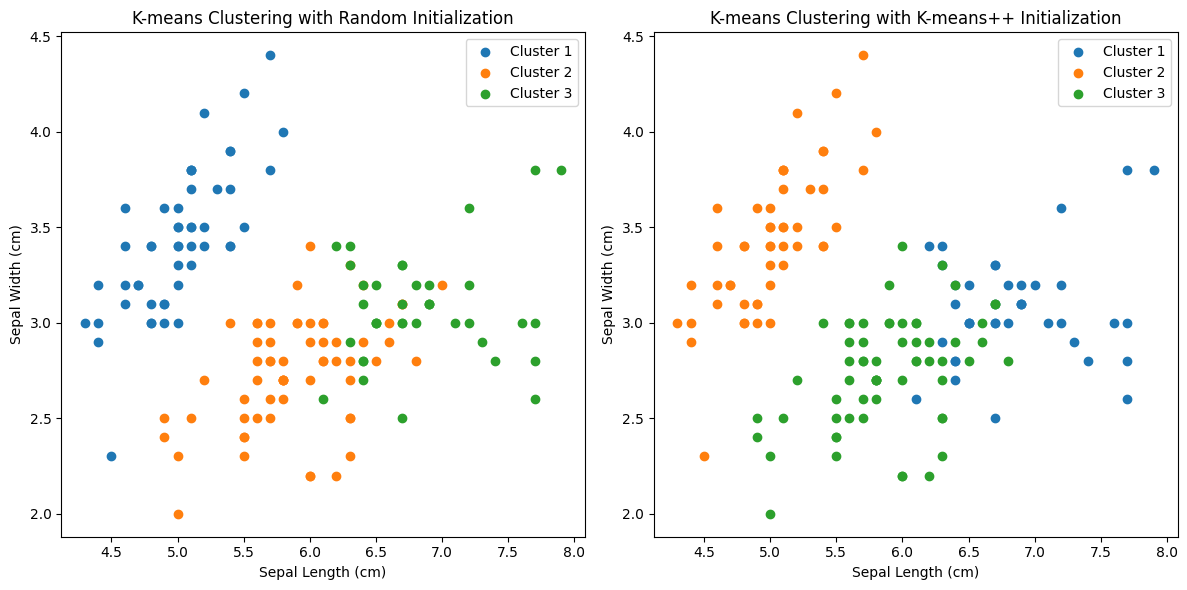

In [52]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np
def kmeans_plus_plus_init(D, G):
    centroids = [D[np.random.choice(D.shape[0])]]

    for _ in range(1, G):
        distances = np.array([min([np.linalg.norm(c - point) for c in centroids]) for point in D])
        probabilities = distances / distances.sum()
        next_centroid_index = np.random.choice(D.shape[0], p=probabilities)
        centroids.append(D[next_centroid_index])

    return np.array(centroids)

def kmeans(D, G, max_iterations=100, init_method='random'):
    if init_method == 'random':
        centroids_indices = np.random.choice(D.shape[0], G, replace=False)
        centroids = D[centroids_indices]
    elif init_method == 'kmeans++':
        centroids = kmeans_plus_plus_init(D, G)
    else:
        raise ValueError("Invalid initialization method. Choose 'random' or 'kmeans++'.")

    clusters = [[] for _ in range(G)]

    for _ in range(max_iterations):
        new_clusters = [[] for _ in range(G)]
        for point in D:
            distances = np.linalg.norm(centroids - point, axis=1)
            closest_centroid_index = np.argmin(distances)
            new_clusters[closest_centroid_index].append(point)

        if all(np.array_equal(new_clusters[i], clusters[i]) for i in range(G)):
            break

        clusters = new_clusters

        for i in range(G):
            if len(clusters[i]) > 0:
                centroids[i] = np.mean(clusters[i], axis=0)

    return clusters

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
G = 3


# Test K-means with random initialization
clusters_random = kmeans(X, G, init_method='random')

# Test K-means with K-means++ initialization
clusters_kmeans_pp = kmeans(X, G, init_method='kmeans++')


# Plot the clusters for random initialization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

for i, cluster in enumerate(clusters_random):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')

plt.title('K-means Clustering with Random Initialization')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

# Plot the clusters for K-means++ initialization
plt.subplot(1, 2, 2)

for i, cluster in enumerate(clusters_kmeans_pp):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')

plt.title('K-means Clustering with K-means++ Initialization')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

plt.tight_layout()
plt.show()

In the context of the K-means algorithm, "init" refers to the method used to initialize the cluster centroids at the beginning of the algorithm. The choice of initialization method can influence the convergence of the algorithm and the quality of the resulting clusters. Here are some common initialization methods:

**Random initialization** This method randomly selects K data points from the dataset as the initial cluster centroids. While simple, this approach can lead to different results each time the algorithm is run and may converge to a suboptimal solution.

**K-means++** This method improves upon random initialization by selecting initial centroids that are far apart from each other. It starts by randomly selecting one data point as the first centroid, then iteratively selects the next centroid from the remaining data points with a probability proportional to the squared distance from the nearest existing centroid. K-means++ tends to produce better initial centroids and can lead to faster convergence and more accurate clustering results.

**Precomputed centroids** In some cases, particularly when the dataset is large or preprocessed, centroids might be computed using some other method outside of the K-means algorithm and provided as initial values. These could be computed using domain-specific knowledge or another clustering algorithm.

**Manual initialization** In certain situations, especially when the data has clear patterns or the number of clusters is known beforehand, centroids might be manually specified by an expert. This approach can ensure that the algorithm starts with centroids that are likely to lead to meaningful clusters.

Different implementations of K-means may offer different initialization methods, and the choice of initialization method can impact the algorithm's performance, convergence speed, and the quality of the resulting clusters.

**Assignment - 4**

In [53]:
import numpy as np

# Step 1: Generate a random transition probability matrix for a 3-state Markov chain
def generate_transition_matrix(num_states):
    matrix = np.random.rand(num_states, num_states)
    matrix /= matrix.sum(axis=1, keepdims=True)  # Normalize rows to ensure probabilities sum to 1
    return matrix

# Step 2: Generate a time series of 1000 states
def generate_time_series(transition_matrix, num_steps):
    num_states = transition_matrix.shape[0]
    current_state = np.random.choice(np.arange(num_states), size=1)[0]
    time_series = [current_state]

    for _ in range(num_steps - 1):
        current_state = np.random.choice(np.arange(num_states), p=transition_matrix[current_state])
        time_series.append(current_state)

    return np.array(time_series)

# Step 3: Estimate the transition probability matrix from the generated time series
def estimate_transition_matrix(time_series, num_states):
    transition_matrix_estimate = np.zeros((num_states, num_states))

    for i in range(len(time_series) - 1):
        transition_matrix_estimate[time_series[i], time_series[i + 1]] += 1

    # Normalize rows to obtain probabilities
    transition_matrix_estimate /= transition_matrix_estimate.sum(axis=1, keepdims=True)

    return transition_matrix_estimate

# Main
num_states = 3
num_steps = 1000

# Step 1: Generate a random transition probability matrix
true_transition_matrix = generate_transition_matrix(num_states)

# Step 2: Generate a time series of 1000 states
generated_time_series = generate_time_series(true_transition_matrix, num_steps)

# Step 3: Estimate the transition probability matrix from the generated time series
estimated_transition_matrix = estimate_transition_matrix(generated_time_series, num_states)

# Display the results
print("True Transition Probability Matrix:")
print(true_transition_matrix)
print("\nGenerated Time Series:")
print(generated_time_series)
print("\nEstimated Transition Probability Matrix:")
print(estimated_transition_matrix)


True Transition Probability Matrix:
[[0.24871192 0.30402418 0.4472639 ]
 [0.07763452 0.64324971 0.27911577]
 [0.43958244 0.42850384 0.13191372]]

Generated Time Series:
[1 1 2 0 2 0 1 1 0 0 1 1 2 1 1 1 1 1 1 0 2 2 2 0 0 2 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 2 1 1 1 0 0 2 1 1 1 2 1 0 1 0 0 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 0 1
 1 2 2 1 2 0 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 0 1 1 1 0 0 1
 2 1 1 1 2 0 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 1 1 2 0 1 1 2 1 1 0 2 0 1 1 1 1 1 1 1 1 2
 2 0 0 2 0 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 0 2 0 0 0 0 1 1 2 1 0 1 2 0 2 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 0 2 0 1 2 0 1 1 2 0 0 1 1 1 1 1
 2 1 1 1 1 2 0 2 0 0 0 1 1 1 0 2 1 0 1 2 0 2 0 2 1 2 0 0 2 1 1 2 1 2 0 2 1
 0 1 1 2 2 1 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0 2 2 0 1 1 2 1 1
 1 0 1 2 1 1 2 2 0 1 1 1 1 2 0 1 2 0 1 2 0 0 2 1 1 1 1 1 1 2 2 1 1 2 1 1 2
 1 2 2 1 1 1 2 0 2 0 2 0 0 2 0 2 0 1 2 1 1 1 1 1 2 1 0 2 0 0 1 1 0 1 1 1 1
 1 1 1

A Markov Chain is a mathematical model that represents a system that undergoes transitions between different states in a way that satisfies the Markov property. The Markov property states that the probability of transitioning to any particular state depends solely on the current state and time elapsed, regardless of how the system arrived at its current state.

Key components of a Markov Chain:

**States** The distinct conditions or situations that a system can be in. For example, in a weather model, states could be "sunny," "cloudy," or "rainy."

**Transitions** Probabilities associated with moving from one state to another. These transition probabilities are typically organized into a matrix known as the transition probability matrix.

**Markov Property** The probability of transitioning to the next state depends only on the current state and not on the sequence of events that preceded it.

Markov Chains are widely used in various fields, including physics, chemistry, economics, computer science, and biology, to model and analyze systems that exhibit stochastic (random) behavior over time. They provide a simple yet powerful framework for understanding and predicting the evolution of systems with uncertain transitions between states.